In [1]:
import pandas as pd

In [2]:
df=pd.read_excel(r"D:\MLResearch\Sales Prediction Dataset\advertising_sales_data.xlsx")

In [3]:
df

,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4
2,camp3,17.2,45.9,69.3,12.0
3,camp4,151.5,41.3,58.5,16.5
4,camp5,180.8,10.8,58.4,17.9
...,...,...,...,...,...
195,camp196,38.2,3.7,13.8,7.6
196,camp197,94.2,4.9,8.1,14.0
197,camp198,177.0,9.3,6.4,14.8
198,camp199,283.6,42.0,66.2,25.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Campaign   200 non-null    object 
 1   TV         200 non-null    float64
 2   Radio      198 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

Campaign     0
TV           0
Radio        2
Newspaper    0
Sales        0
dtype: int64

In [8]:
df['Radio'].mean()

23.26060606060606

In [11]:
for i in df.columns:
    if df[i].dtype=='object':
        df[i].fillna(df[i].mode()[0],inplace=True)
    else:
        df[i].fillna(df[i].mean(),inplace=True)

In [12]:
df.isnull().sum()

Campaign     0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [14]:
#1.	What is the average amount spent on TV advertising in the dataset?
aver=df['TV'].mean()
print(f"The average amount spent on TV advertising is ${aver:.2f}")

The average amount spent on TV advertising is $147.04


In [15]:
#2.What is the correlation between radio advertising expenditure and product sales?
corr=df['Radio'].corr(df['Sales'])
print(f"The correlation between radio advertising expenditure and product sales is {corr:.2f}")

The correlation between radio advertising expenditure and product sales is 0.35


In [17]:
numeric_col=df.select_dtypes(include=['int64','float64']).columns
numeric_col

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [20]:
#3.	Which advertising medium has the highest impact on sales based on the dataset?
corr1=df[numeric_col].corr()['Sales'].drop('Sales')
print('correlations with sales:')
print(corr1)

correlations with sales:
TV           0.901208
Radio        0.349651
Newspaper    0.157960
Name: Sales, dtype: float64


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

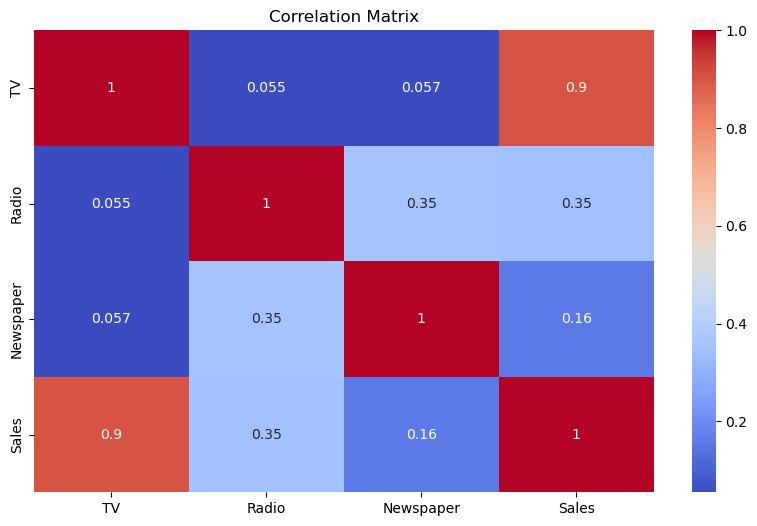

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_col].corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [28]:
pivot=df.pivot_table(values=['TV','Radio','Newspaper','Sales'],columns=['Campaign'],aggfunc='sum')
pivot

Campaign,camp1,camp10,camp100,camp101,camp102,camp103,camp104,camp105,camp106,camp107,...,camp90,camp91,camp92,camp93,camp94,camp95,camp96,camp97,camp98,camp99
Newspaper,69.2,21.2,45.9,49.8,100.9,21.4,17.9,5.3,59.0,29.7,...,51.4,9.3,33.0,59.0,72.3,10.9,52.9,5.9,22.0,51.2
Radio,37.8,2.6,41.7,4.3,36.3,10.1,17.2,34.3,46.4,11.0,...,47.8,4.9,1.5,33.5,36.5,14.0,31.6,3.5,21.0,42.3
Sales,22.1,15.6,17.2,16.7,23.8,19.8,19.7,20.7,15.0,7.2,...,16.7,14.0,7.3,19.4,22.2,11.5,16.9,16.7,20.5,25.4
TV,230.1,199.8,135.2,222.4,296.4,280.2,187.9,238.2,137.9,25.0,...,109.8,134.3,28.6,217.7,250.9,107.4,163.3,197.6,184.9,289.7


In [29]:
#4.	Plot a linear regression line that includes all variables (TV, Radio, Newspaper) to predict Sales, and visualize the model's predictions against the actual sales values.
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [35]:
X=df.drop(['Sales','Campaign'],axis=1)
Y=df['Sales']

In [36]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [37]:
Y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [39]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=24)

In [40]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [41]:
pred=lr.predict(x_test)

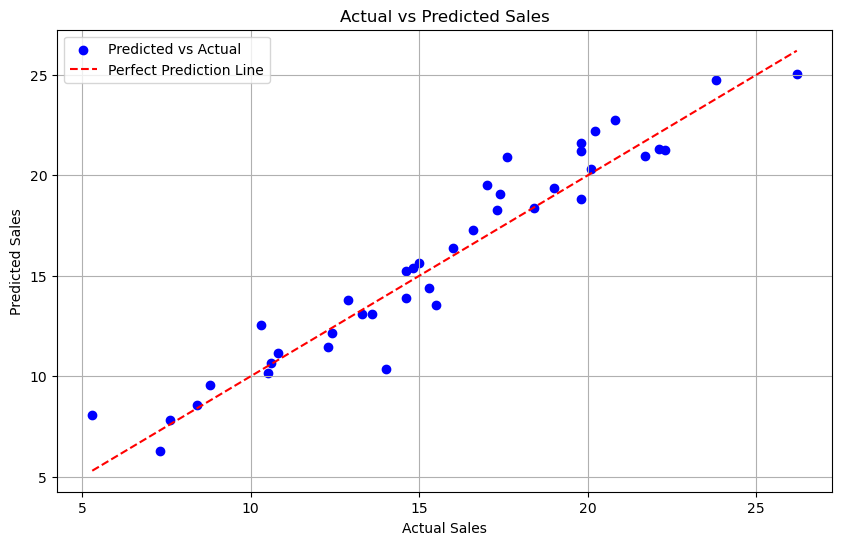

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test,pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score=r2_score(y_test,pred)
print(r2_score)

0.9182970944861057


In [51]:
print(f"Mean Squared Error: {mean_squared_error(y_test,pred):.2f}")
print(f"Model Coefficients: {lr.coef_}")
print(f"Intercept: {lr.intercept_}")

Mean Squared Error: 1.92
Model Coefficients: [ 0.05545861  0.1065306  -0.00156511]
Intercept: 4.608431947653186


In [54]:
#5.	How would sales be predicted for a new set of advertising expenditures: $200 on TV, $40 on Radio, and $50 on Newspaper?
new=pd.DataFrame({'TV':[200],'Radio':[40],'Newspaper':[50]})

In [55]:
new_pred=lr.predict(new)

In [63]:
print(f"Predicted sales for the new set of advertising expenditures: ${new_pred[0]:.2f}")

Predicted sales for the new set of advertising expenditures: $19.88


In [57]:
#6.	What is the impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors?
new1=pd.DataFrame({'TV':[0],'Radio':[40],'Newspaper':[50]})

In [58]:
new1_pred=lr.predict(new1)

In [64]:
print(f"Predicted sales for the new set of without TV advertising expenditures: ${new1_pred[0]:.2f}")

Predicted sales for the new set of without TV advertising expenditures: $8.79
